In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from scipy.stats import zscore

In [37]:
costumer = pd.read_csv('customer.csv')
costumer.head()
costumer.fillna({'is_employed': 'False'}, inplace=True)
# costumer.dropna(axis=0, inplace=True)


In [38]:
print(costumer['Unnamed: 0'].nunique())
costumer.drop('Unnamed: 0', axis=1, inplace=True)

72458


In [39]:
costumer.describe()

,income,num_vehicles,age,code_column,gas_usage,rooms
count,7.245800e+04,70772.000000,72458.000000,72458.000000,70772.000000,72458.000000
mean,4.188143e+04,2.066820,49.208893,3285.523572,41.230501,3.494549
std,5.827460e+04,1.170076,18.090035,2661.775225,63.149323,1.706537
min,-6.900000e+03,0.000000,0.000000,131.000000,1.000000,1.000000
25%,1.070000e+04,1.000000,34.000000,1305.000000,3.000000,2.000000
50%,2.640000e+04,2.000000,48.000000,2269.000000,10.000000,3.000000
75%,5.200000e+04,3.000000,62.000000,4979.000000,60.000000,5.000000
max,1.257000e+06,6.000000,120.000000,8962.000000,570.000000,6.000000


In [40]:
costumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custid          72458 non-null  object 
 1   sex             72458 non-null  object 
 2   is_employed     72458 non-null  object 
 3   income          72458 non-null  float64
 4   marital_status  72458 non-null  object 
 5   health_ins      72458 non-null  bool   
 6   housing_type    70772 non-null  object 
 7   num_vehicles    70772 non-null  float64
 8   age             72458 non-null  int64  
 9   state_of_res    72458 non-null  object 
 10  code_column     72458 non-null  int64  
 11  gas_usage       70772 non-null  float64
 12  rooms           72458 non-null  int64  
 13  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(7)
memory usage: 7.3+ MB


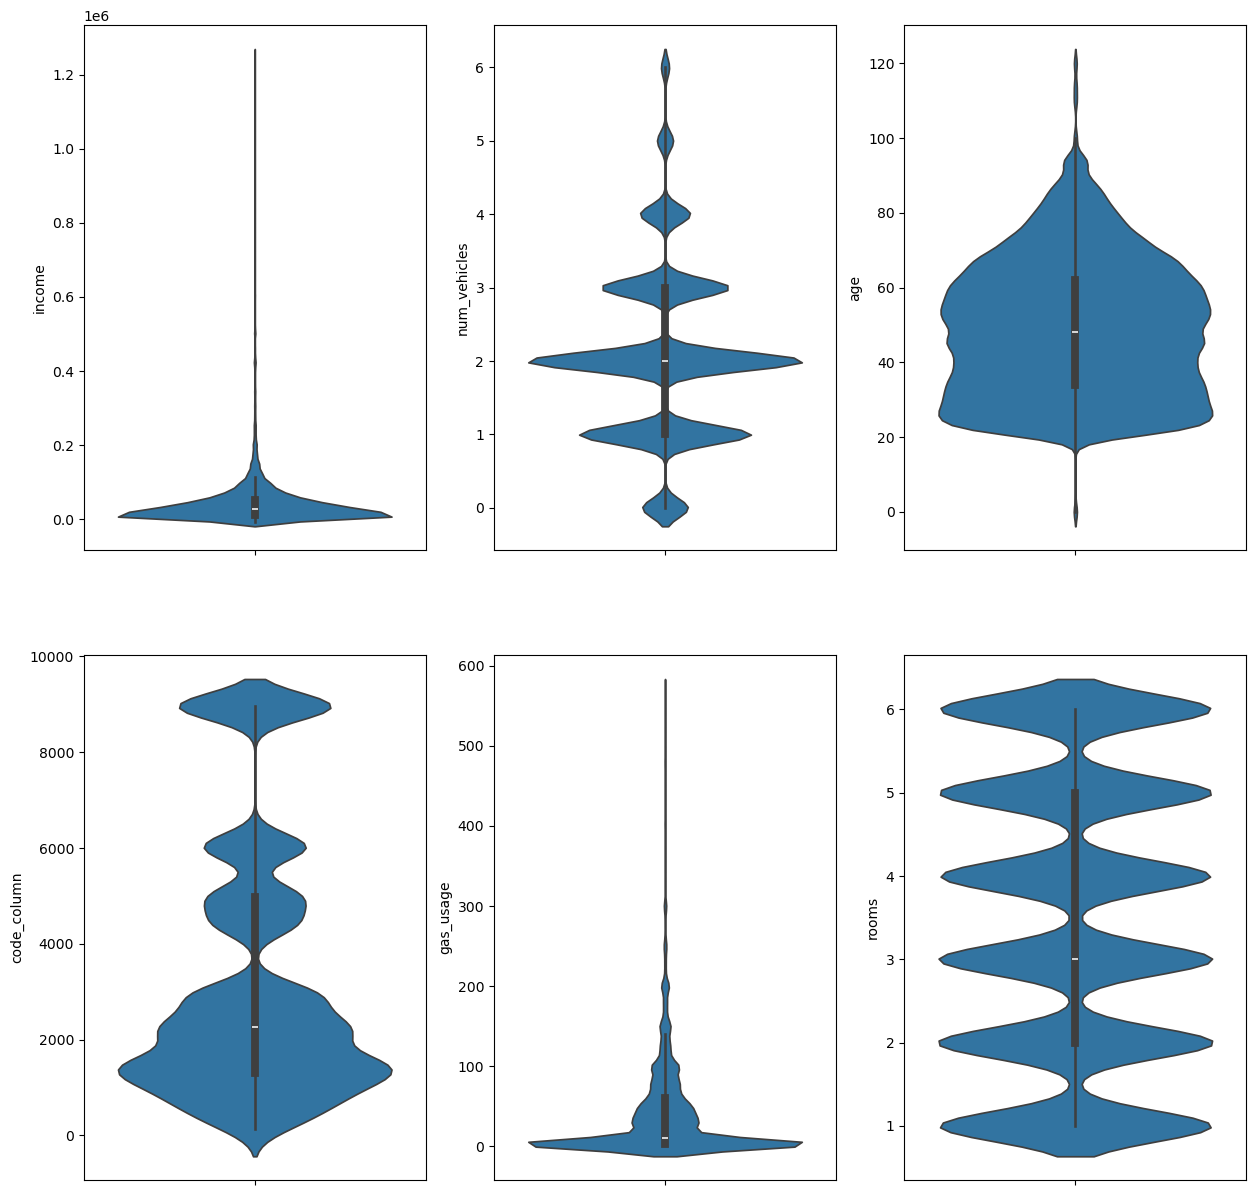

In [41]:
fig, ax = plt.subplots(2,3, figsize=(15,15))

for i, col in enumerate(costumer.select_dtypes(include = ['float64', 'int64']).columns):
    sns.violinplot(data=costumer[col], ax=ax[i//3, i%3])
plt.show()

In [42]:
df_num = costumer.select_dtypes(include = ['float64', 'int64'])

c:\Users\castr\anaconda3\envs\IAP2\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


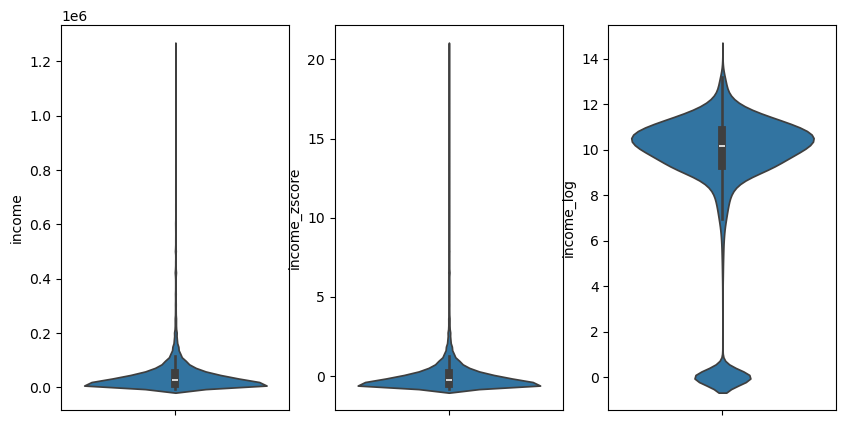

In [43]:
costumer[['income_zscore']] = costumer[['income']].apply(zscore)

costumer['income_log'] = np.log1p(costumer['income'], )


fig, ax = plt.subplots(1,3, figsize=(10,5))
sns.violinplot(data=costumer['income'], ax = ax[0])
sns.violinplot(data=costumer['income_zscore'], ax = ax[1])

sns.violinplot(data=costumer['income_log'], ax = ax[2])
plt.show()

In [44]:
df_num = costumer.select_dtypes(include = ['float64', 'int64'])

In [45]:
costumer['gas_payment'] = costumer['gas_usage'].replace([x for x in costumer['gas_usage'] if x not in [1, 2, 3]], 0)

In [46]:
costumer['gas_usage'] = costumer['gas_usage'].replace([x for x in costumer['gas_usage'] if x in [1, 2, 3]], 0)